In [340]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [220]:
data = pd.read_csv("CarPrice_Assignment.csv", encoding_errors="ignore")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Exploration

In [222]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [223]:
data.shape

(205, 26)

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [225]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [226]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [227]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [228]:
data.duplicated().sum()

0

#### Skewness

In [230]:
data.select_dtypes(include=['number']).skew().sort_values(ascending=True)

stroke             -0.689705
car_ID              0.000000
boreratio           0.020156
carheight           0.063123
peakrpm             0.075159
carlength           0.155954
symboling           0.211072
highwaympg          0.539997
citympg             0.663704
curbweight          0.681398
carwidth            0.904003
wheelbase           1.050214
horsepower          1.405310
price               1.777678
enginesize          1.947655
compressionratio    2.610862
dtype: float64

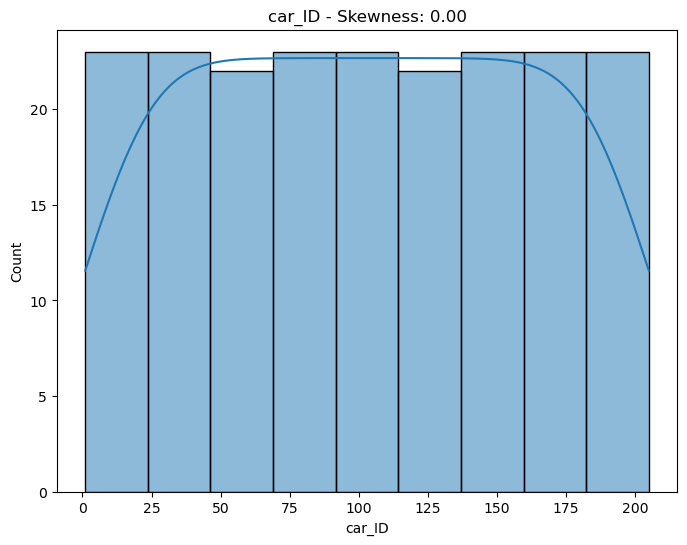

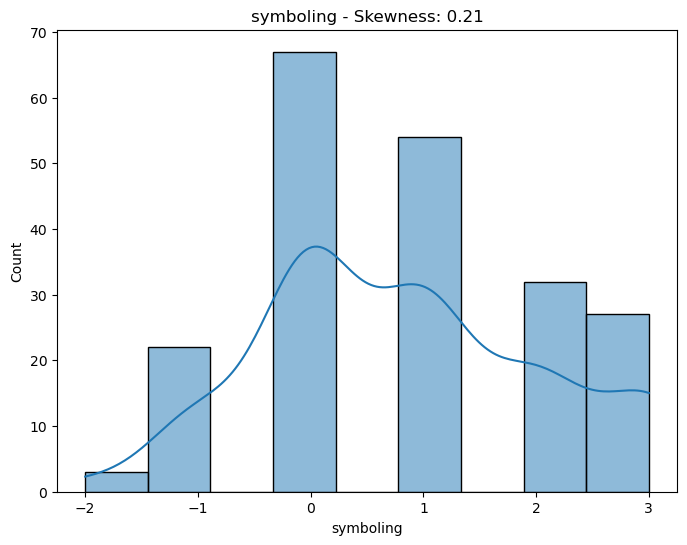

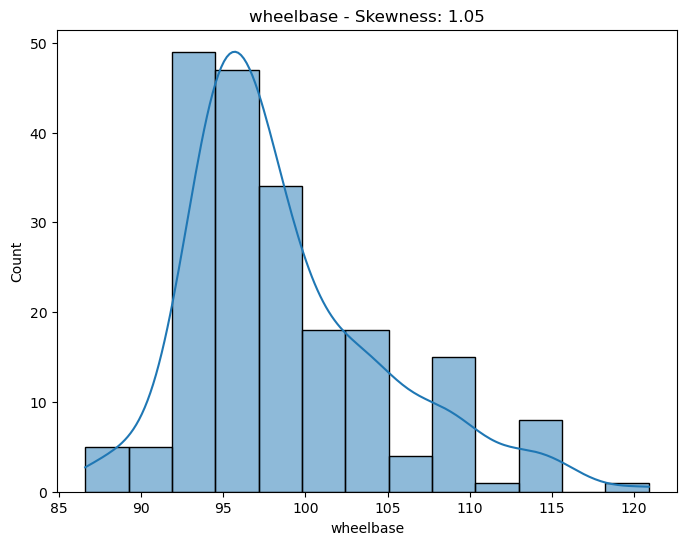

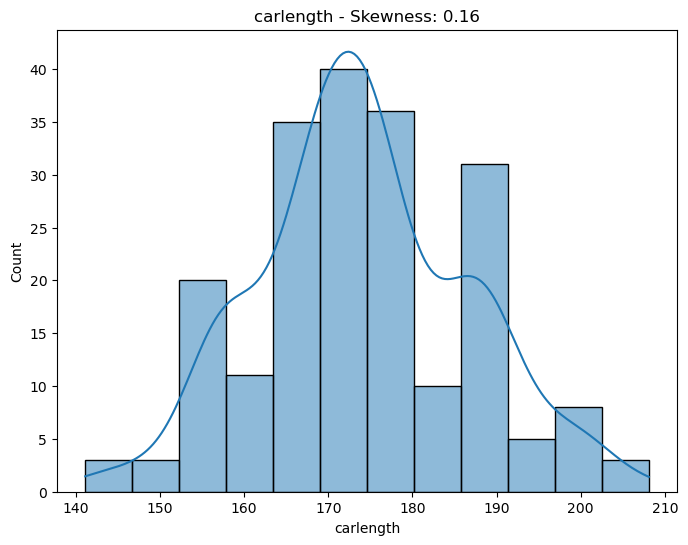

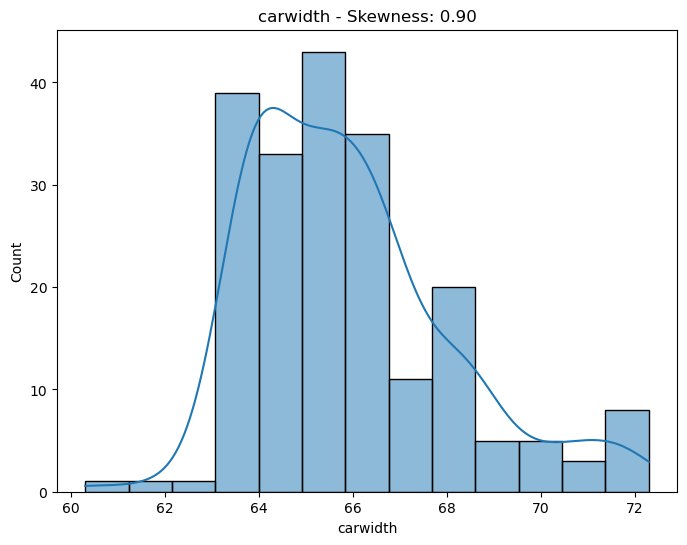

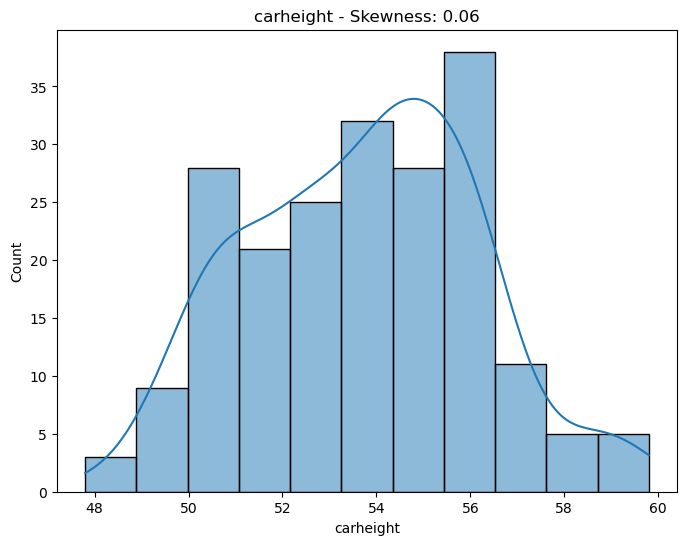

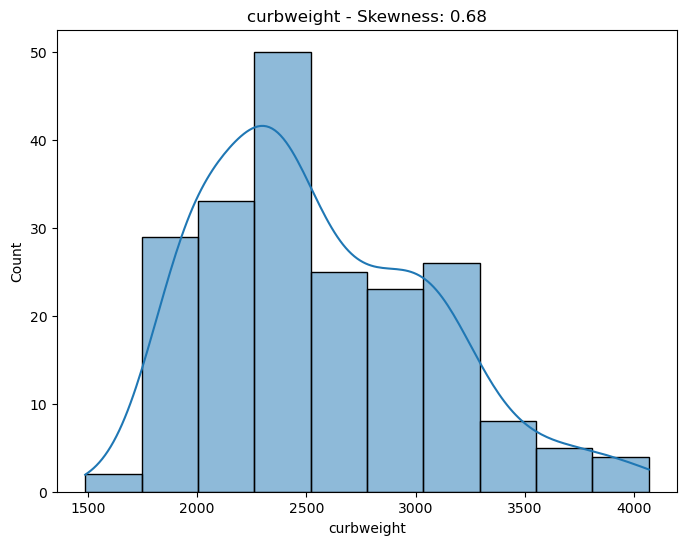

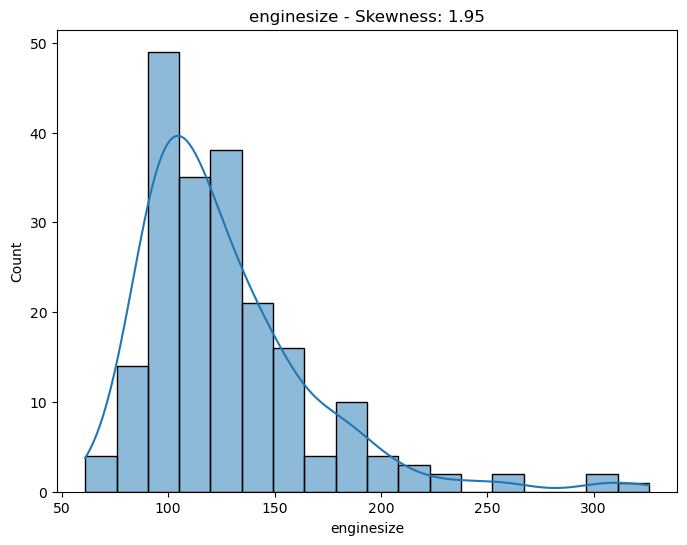

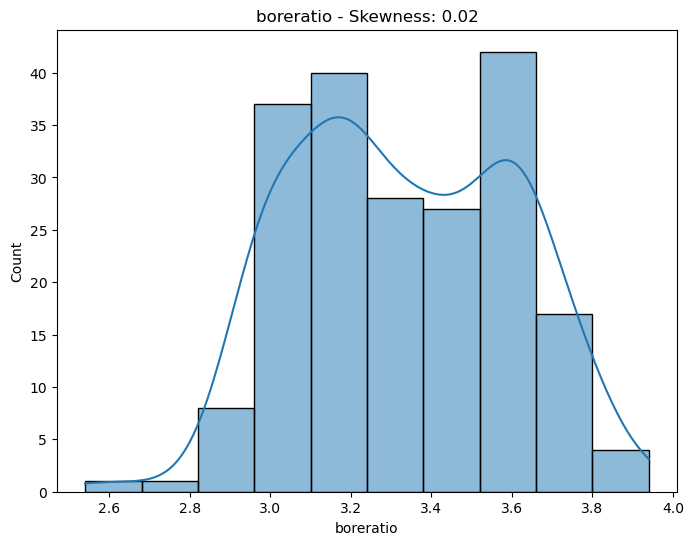

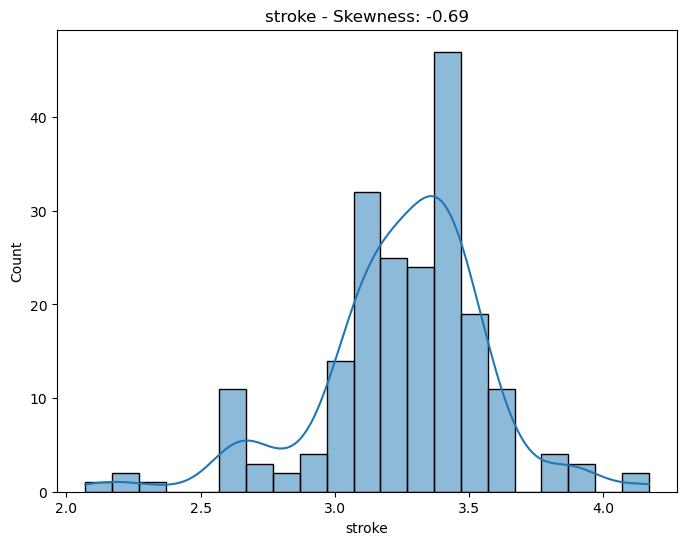

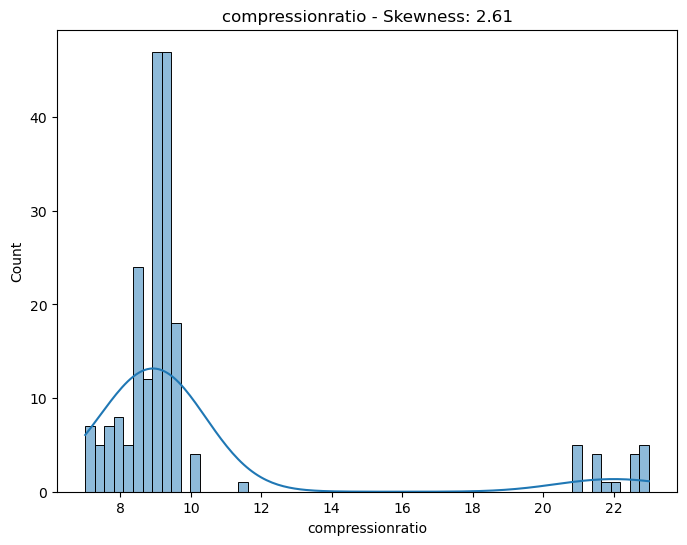

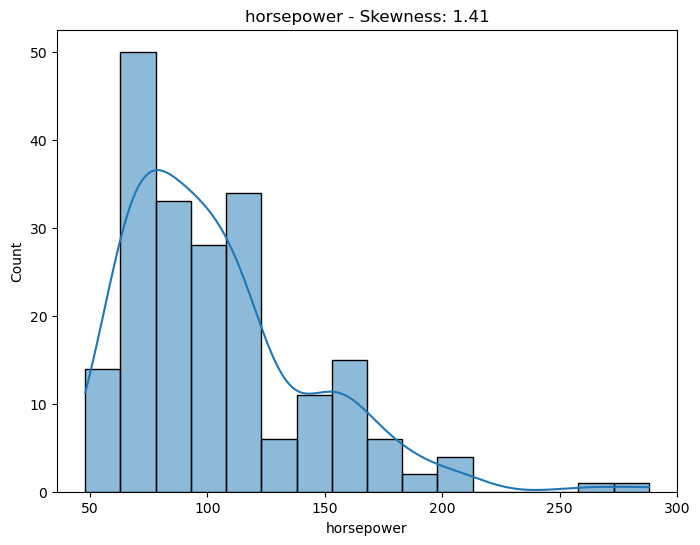

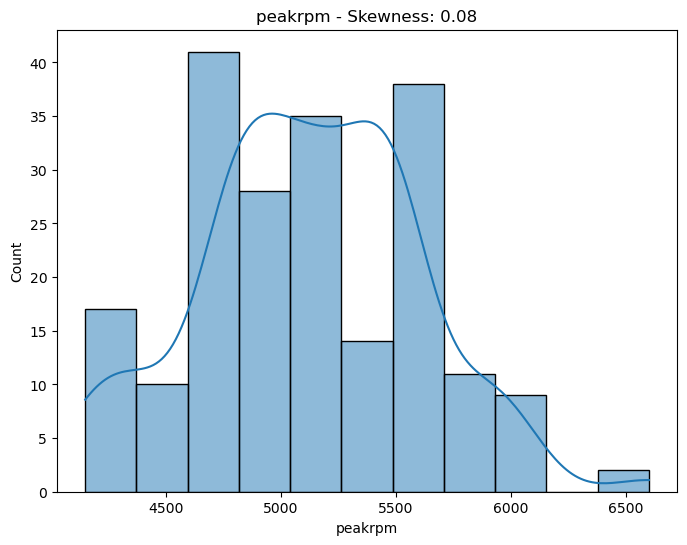

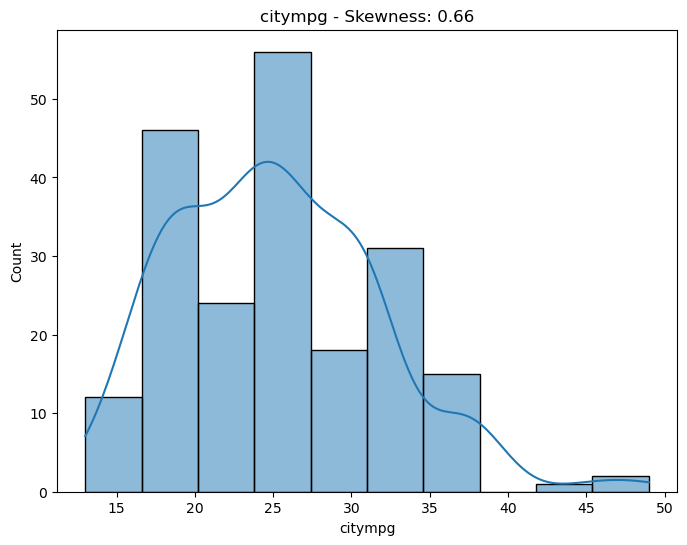

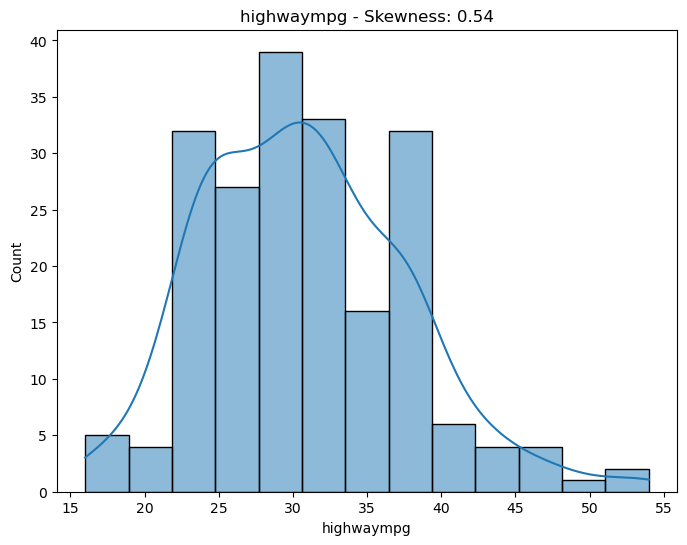

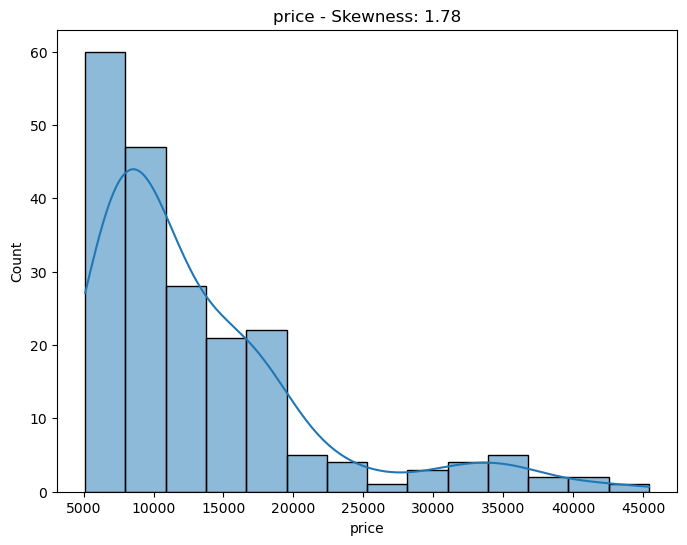

In [231]:
numeric_data = data.select_dtypes(include=['number'])

# Plot skewness for each numeric column
for col in numeric_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(numeric_data[col], kde=True)
    plt.title(f'{col} - Skewness: {numeric_data[col].skew():.2f}')
    plt.show()

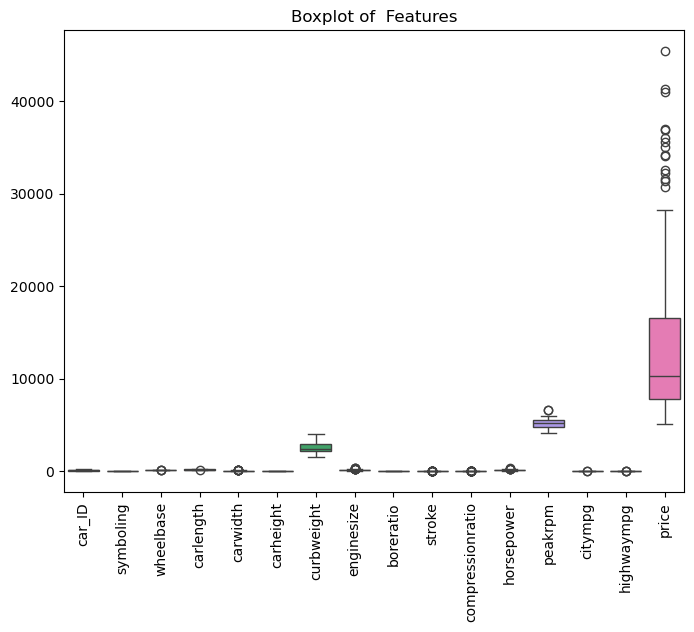

In [232]:
plt.figure(figsize=(8, 6))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [233]:
# LOG Transformation for right skewed features
new_data= data.copy() #creating a copy before skewness corrections


# List of columns to apply the log transformation
columns_to_transform = ['curbweight', 'citympg', 'carwidth', 'wheelbase','horsepower','price','enginesize','compressionratio']

# Apply log transformation (log(x + 1)) for each column in the list
for col in columns_to_transform:
    new_data[col] = np.log(new_data[col] + 1)


new_data.select_dtypes(include=['number']).skew().sort_values(ascending=True)

stroke             -0.689705
car_ID              0.000000
boreratio           0.020156
citympg             0.026578
carheight           0.063123
peakrpm             0.075159
carlength           0.155954
symboling           0.211072
curbweight          0.270250
horsepower          0.489938
highwaympg          0.539997
price               0.672964
carwidth            0.815331
enginesize          0.864706
wheelbase           0.885024
compressionratio    2.379056
dtype: float64

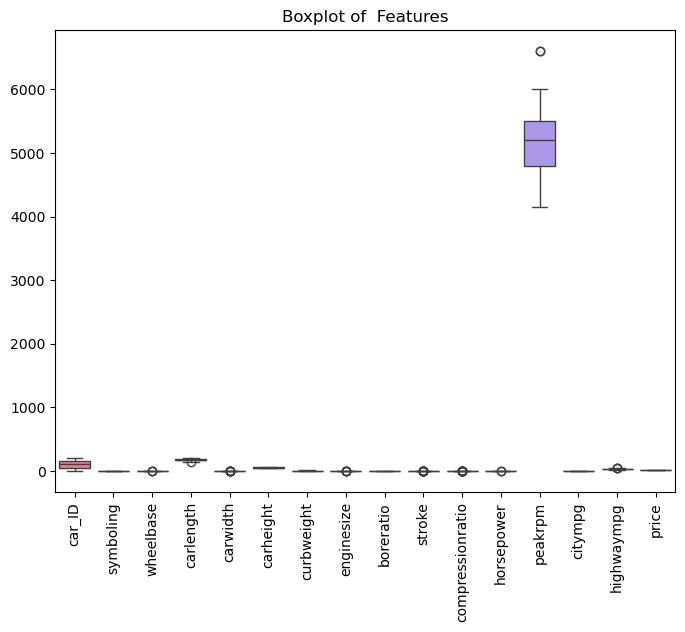

In [234]:
plt.figure(figsize=(8, 6))
sns.boxplot(new_data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [235]:
new_data.shape

(205, 26)

In [236]:
print(len(new_data.columns))

26


In [237]:
new_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,4.495355,...,4.875197,mpfi,3.47,2.68,2.302585,4.718499,5000,3.091042,27,9.510149
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,4.495355,...,4.875197,mpfi,3.47,2.68,2.302585,4.718499,5000,3.091042,27,9.711176
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,4.559126,...,5.030438,mpfi,2.68,3.47,2.302585,5.043425,5000,2.995732,26,9.711176
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,4.613138,...,4.700480,mpfi,3.19,3.40,2.397895,4.634729,5500,3.218876,30,9.543306
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,4.609162,...,4.919981,mpfi,3.19,3.40,2.197225,4.753590,5500,2.944439,22,9.767152


In [238]:
new_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm               int64
citympg             float64
highwaympg            int64
price               float64
dtype: object

In [272]:
print("Unique values in 'doornumber':", new_data['doornumber'].unique())
print("Unique values in 'cylindernumber':", new_data['cylindernumber'].unique())



Unique values in 'doornumber': ['two' 'four']
Unique values in 'cylindernumber': ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [274]:
df = new_data.copy()
# Drop 'CarName' as it's a text column and not useful directly
df.drop(columns=['CarName'], inplace=True)

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})

# Convert 'cylindernumber' to numerical (Ordinal)
cylinder_mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)

# One-Hot Encoding for Nominal Categorical Variables
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel',
                                 'enginelocation', 'enginetype', 'fuelsystem'], drop_first=True)

# Print first 5 rows of the processed dataset
print(df.head())


   car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0       1          3           2   4.495355      168.8  4.175925       48.8   
1       2          3           2   4.495355      168.8  4.175925       48.8   
2       3          1           2   4.559126      171.2  4.197202       52.4   
3       4          2           4   4.613138      176.6  4.207673       54.3   
4       5          2           4   4.609162      176.6  4.210645       54.3   

   curbweight  cylindernumber  enginesize  ...  enginetype_ohcf  \
0    7.843456               4    4.875197  ...            False   
1    7.843456               4    4.875197  ...            False   
2    7.945910               6    5.030438  ...            False   
3    7.757051               4    4.700480  ...            False   
4    7.946264               5    4.919981  ...            False   

   enginetype_ohcv  enginetype_rotor  fuelsystem_2bbl  fuelsystem_4bbl  \
0            False             False            

In [276]:
df.dtypes

car_ID                   int64
symboling                int64
doornumber               int64
wheelbase              float64
carlength              float64
carwidth               float64
carheight              float64
curbweight             float64
cylindernumber           int64
enginesize             float64
boreratio              float64
stroke                 float64
compressionratio       float64
horsepower             float64
peakrpm                  int64
citympg                float64
highwaympg               int64
price                  float64
fueltype_gas              bool
aspiration_turbo          bool
carbody_hardtop           bool
carbody_hatchback         bool
carbody_sedan             bool
carbody_wagon             bool
drivewheel_fwd            bool
drivewheel_rwd            bool
enginelocation_rear       bool
enginetype_dohcv          bool
enginetype_l              bool
enginetype_ohc            bool
enginetype_ohcf           bool
enginetype_ohcv           bool
enginety

In [278]:
df.shape

(205, 40)

In [284]:
print(df.corr()['price'].sort_values(ascending=False))

price                  1.000000
curbweight             0.890682
enginesize             0.845865
horsepower             0.842819
carwidth               0.802836
carlength              0.767859
drivewheel_rwd         0.684021
cylindernumber         0.631721
wheelbase              0.625217
boreratio              0.610563
fuelsystem_mpfi        0.605463
enginetype_ohcv        0.353313
enginelocation_rear    0.265137
aspiration_turbo       0.257435
carbody_hardtop        0.176112
carheight              0.162795
carbody_sedan          0.143369
enginetype_dohcv       0.139299
fuelsystem_idi         0.132638
stroke                 0.097990
enginetype_l           0.095352
doornumber             0.086613
compressionratio       0.062680
enginetype_rotor       0.030917
fuelsystem_mfi         0.016054
fuelsystem_4bbl        0.011103
carbody_wagon         -0.003009
fuelsystem_spfi       -0.006225
enginetype_ohcf       -0.023801
fuelsystem_spdi       -0.033127
car_ID                -0.044496
peakrpm 

In [286]:
# SelectKBest for feature selection
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target

select_k = SelectKBest(score_func=f_classif, k=15)  
X_selected = select_k.fit_transform(X, y)

print("Selected Features:", X.columns[select_k.get_support()])

Selected Features: Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'horsepower', 'citympg', 'carbody_hardtop',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_rotor',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_spfi'],
      dtype='object')


In [295]:
selected_columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'horsepower', 'citympg', 'carbody_hardtop',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_rotor',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_spfi','price']

# Create a new DataFrame with only the selected columns
new_data_2 = df[selected_columns]
new_data_2

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,carbody_hardtop,enginelocation_rear,enginetype_dohcv,enginetype_rotor,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_spfi,price
0,4.495355,168.8,4.175925,7.843456,4,4.875197,4.718499,3.091042,False,False,False,False,False,False,False,9.510149
1,4.495355,168.8,4.175925,7.843456,4,4.875197,4.718499,3.091042,False,False,False,False,False,False,False,9.711176
2,4.559126,171.2,4.197202,7.945910,6,5.030438,5.043425,2.995732,False,False,False,False,False,False,False,9.711176
3,4.613138,176.6,4.207673,7.757051,4,4.700480,4.634729,3.218876,False,False,False,False,False,False,False,9.543306
4,4.609162,176.6,4.210645,7.946264,5,4.919981,4.753590,2.944439,False,False,False,False,False,False,False,9.767152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4.701389,188.8,4.247066,7.990577,4,4.955827,4.744932,3.178054,False,False,False,False,False,False,False,9.731869
201,4.701389,188.8,4.245634,8.022897,4,4.955827,5.081404,2.995732,False,False,False,False,False,False,False,9.854612
202,4.701389,188.8,4.247066,8.010692,6,5.159055,4.905275,2.944439,False,False,False,False,False,False,False,9.975157
203,4.701389,188.8,4.247066,8.076515,6,4.983607,4.672829,3.295837,False,False,False,False,False,False,False,10.019981


In [297]:
new_data_2.shape

(205, 16)

### Split data

In [299]:
X = new_data_2.drop('price',axis=1)
y = new_data_2['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(164, 15) (41, 15) (164,) (41,)


### Feature Scaling

In [302]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [304]:
y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

In [313]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [315]:
y_test_df = pd.DataFrame(y_test) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_test_df)
y_test_scaled = scaler.transform(y_test_df)

### Model training using Linear regression

In [323]:
models = {
    "Linear Regression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

In [329]:
model_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test_scaled, predictions)
    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = mean_squared_error(y_test_scaled, predictions, squared=False)
    r2 = r2_score(y_test_scaled, predictions)
    model_results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

In [331]:
# Display model performance
for name, metrics in model_results.items():
    print(f"\n{name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Linear Regression Performance:
MAE: 0.2843
MSE: 0.1307
RMSE: 0.3615
R2 Score: 0.8693

DecisionTreeRegressor Performance:
MAE: 0.3032
MSE: 0.1275
RMSE: 0.3570
R2 Score: 0.8725

Random Forest Regressor Performance:
MAE: 0.2481
MSE: 0.0857
RMSE: 0.2927
R2 Score: 0.9143


#### Random Forest performs the best overall
* Lowest MAE, MSE, and RMSE, meaning it makes fewer errors
* Highest R² Score (0.9143), indicating better prediction accuracy

#### Decision Tree vs. Linear Regression
* Decision Tree performs slightly better in terms of R² Score and RMSE.
* However, Linear Regression has a lower MAE, meaning it makes smaller absolute errors.

### GradientBoostingRegressor & SVR

In [336]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_gbr = gbr.predict(X_test_scaled)


In [338]:
mae_gbr = mean_absolute_error(y_test_scaled, y_pred_gbr)
mse_gbr = mean_squared_error(y_test_scaled, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test_scaled, y_pred_gbr)

print("Gradient Boosting Regressor Performance:")
print(f"MAE: {mae_gbr:.4f}")
print(f"MSE: {mse_gbr:.4f}")
print(f"RMSE: {rmse_gbr:.4f}")
print(f"R2 Score: {r2_gbr:.4f}")

Gradient Boosting Regressor Performance:
MAE: 0.2581
MSE: 0.0900
RMSE: 0.3001
R2 Score: 0.9100


In [344]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)

SVR()

In [346]:
y_pred_svr = svr.predict(X_test_scaled)

In [348]:
mae_svr = mean_absolute_error(y_test_scaled, y_pred_svr)
mse_svr = mean_squared_error(y_test_scaled, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test_scaled, y_pred_svr)

print("\nSupport Vector Regressor Performance:")
print(f"MAE: {mae_svr:.4f}")
print(f"MSE: {mse_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"R2 Score: {r2_svr:.4f}")


Support Vector Regressor Performance:
MAE: 0.3068
MSE: 0.1751
RMSE: 0.4185
R2 Score: 0.8249


#### Best Model: Random Forest Regressor
* Lowest MAE, MSE, and RMSE → Most accurate predictions
* Highest R² Score (0.9143) → Best explanatory power

#### Runner-up: Gradient Boosting Regressor (GBR)
* Close performance to Random Forest, slightly lower R² Score
* May improve with hyperparameter tuning (learning rate, estimators)

### hyperparameter tuning

In [355]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train_scaled)

# Best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Best model evaluation
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)



print("\nTuned Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test_scaled, y_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_test_scaled, y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf)):.4f}")
print(f"R2 Score: {r2_score(y_test_scaled, y_pred_rf):.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Random Forest Performance:
MAE: 0.2424
MSE: 0.0832
RMSE: 0.2885
R2 Score: 0.9168


In [356]:


# Define parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10]
}

# Initialize model
gb = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_scaled, y_train_scaled)

# Best parameters
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Best model evaluation
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)

print("\nTuned Gradient Boosting Performance:")
print(f"MAE: {mean_absolute_error(y_test_scaled, y_pred_gb):.4f}")
print(f"MSE: {mean_squared_error(y_test_scaled, y_pred_gb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_scaled, y_pred_gb)):.4f}")
print(f"R2 Score: {r2_score(y_test_scaled, y_pred_gb):.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Tuned Gradient Boosting Performance:
MAE: 0.2559
MSE: 0.0876
RMSE: 0.2959
R2 Score: 0.9124


* Random Forest performed best overall after tuning.
* Gradient Boosting slightly improved but had a higher MAE than before.